# Computing SFRD

In the present work, we want to update the measurements of star formation rate density from the recent observations. The idea is to use luminosity function (the Schechter function) with the updated parameters from the literature to compute the luminosity density and then using this updated luminosity function to calculate the star formation rate density. In this notebook we try to summarize our work.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils as utl
import os

## The Schechter function

The Schechter function (Schechter 1975) is an analytic expression for the luminosity of galaxies which can be written as follows:

$$\phi(L) = \left( \frac{\phi^*}{L^*} \right) \left( \frac{L}{L^*} \right)^\alpha \exp{\left( -\frac{L}{L^*} \right)}$$

This function essentially describes the number of galaxies in the given range of luminosity $L$ to $L+dL$. It is evident from the above equation that it is a three parameter function with parameters $\phi^*$, $L^*$ and $\alpha$. Here, $\alpha$ represents the power-law parameter for the faint-end and $L^*$ is the characteristic luminosity, while $\phi*$ serves as the normalisation constant.

Below we plot an example of the Schechter function for the parameters from Bouwens et al. (2021) paper; the parameters are $M_*=-20.28$, $\phi_*=4 \times 10^{-3}$, and $\alpha=-1.52$ --- these parameters are for the redshift $2.1$.

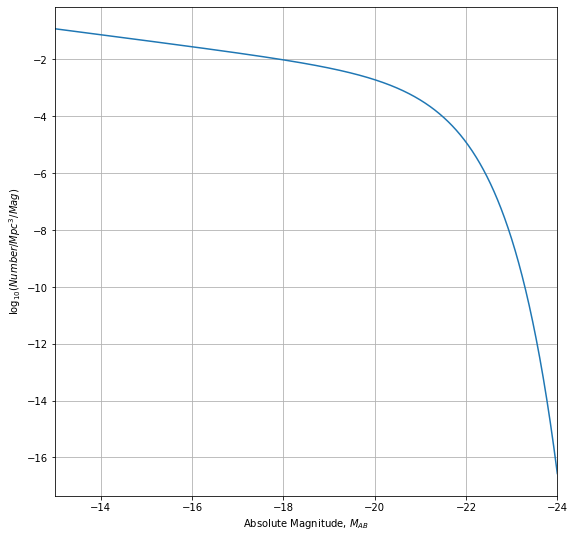

In [4]:
# Defining the Schechter function parameters
mst = -20.28
pst = 4e-3
alp = -1.52

# Range of Magnitudes
mags = np.linspace(-24, -13, 1000)

# The Schechter function
nos = utl.schechter_mag(M=mags, phi1=pst, alpha=alp, m1=mst)
log_nos = np.log10(nos)

# Plotting
plt.figure(figsize=(9,9))
plt.plot(mags, log_nos)
plt.xlabel(r'Absolute Magnitude, $M_{AB}$')
plt.ylabel(r'$\log_{10} (Number/Mpc^3/Mag)$')
plt.xlim([np.max(mags), np.min(mags)])
plt.grid()

In above figure, we can see the nature of the Schechter function. It is evident that, at the fainter magnitudes, the function has the power law shape with the power law index $\alpha$ (this transition happens below the characteristic magnitude $M_*$). Further, we can see that, the more steeper the slope of the faint end, more the contribution from the faint end to the luminosity density. We also note here that, the Schechter function is generally use to find the luminosity function at shorter wavelengths. At higher wavelengths, some other various types of functions have been defined in various papers. One such function, used in Takeuchi et al. (2002) (defined first in Sandage, Tammann & Yahil 1979) is given by,

$$\phi(L) d\log{L} = \phi_* \left( \frac{L}{L_*} \right)^{1-\alpha} \exp{\left( -\frac{1}{2\sigma^2} \left\{ \log{\left[1 + \frac{L}{L_*} \right]}\right\}^2 \right)} d\log L$$

## The luminosity density

We can integrate the luminosity function over luminosity to find the luminosity density, meaning in the sense that the total luminosity coming oout of the given region. We use the `scipy` function `scipy.integrate.simps` function to perform the following integration:

$$\rho (> L_{min}) = \int_{L_{min}}^\infty L \phi(L) dL$$

Here, $L_{min}$ is the minimum luminosity at the faint end which we have taken as the lower end for the above integration. It is evident that the luminosity density will depend on the exact value of $L_{min}$. But for now, we take this value from the Madau & Dickinson (2014) paper, which is $0.03L_*$ ($L_*$ is the characteristic luminosity from the Schechter function).

## Star formation rate density

Once we computed the luminosity density, we can find the star formation rate density just by multiplying it with the proper conversion factor. Such factors are originally postulated in various publications, and later summarized in Madau & Dickinson (2014),

$$SFR = \kappa_{FUV}\times \rho_{FUV}$$ and $$SFR = \kappa_{IR} \times \rho_{IR}$$

where, different $\kappa$s are the abovementioned conversion factors and defined as,

$$\kappa_{FUV} = 2.2 \times 10^{-10} M_\odot year^{-1} L_\odot^{-1}$$ and $$\kappa_{IR} = 4.5 \times 10^{-44} M_\odot year^{-1} erg^{-1} s$$

Here, we note that the value of $\kappa_{FUV}$ is at $1500$ angstrom and it is in the units of solar luminosity, so we want to divide this value to the solar luminosity to find $\kappa_{FUV}$ in cgs units.

We computed the values of SFRD at various redshifts, and using the luminosity function parameters from different papers, elsewhere, and plot them below.

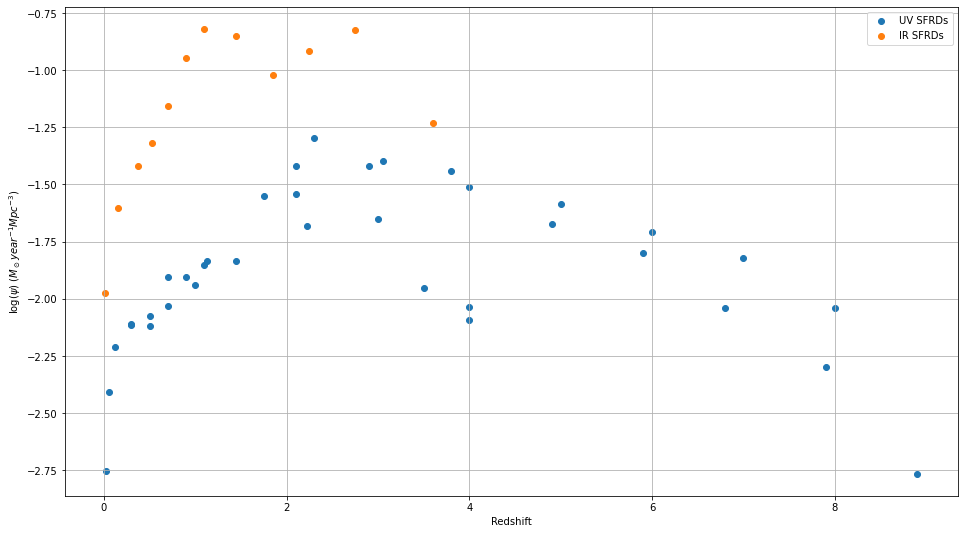

In [10]:
# For UV
ppr_uv = np.loadtxt('sfrd_all_wo_err_UV.dat', usecols=0, unpack=True, dtype=str)
zd_uv, zu_uv, sfrd_uv = np.loadtxt('sfrd_all_wo_err_UV.dat', usecols=(1,2,3), unpack=True)
zcen_uv = (zd_uv + zu_uv)/2
log_sfrd_uv = np.log10(sfrd_uv)

# For IR
ppr_ir = np.loadtxt('sfrd_all_wo_err_IR.dat', usecols=0, unpack=True, dtype=str)
zd_ir, zu_ir, sfrd_ir = np.loadtxt('sfrd_all_wo_err_IR.dat', usecols=(1,2,3), unpack=True)
zcen_ir = (zd_ir + zu_ir)/2
log_sfrd_ir = np.log10(sfrd_ir)

plt.figure(figsize=(16, 9))
plt.scatter(zcen_uv, log_sfrd_uv, label='UV SFRDs')
plt.scatter(zcen_ir, log_sfrd_ir, label='IR SFRDs')
plt.xlabel('Redshift')
plt.ylabel(r'$\log{(\psi)}$ ($M_\odot year^{-1} Mpc^{-3}$)')
plt.grid()
plt.legend(loc='best')

Note that, they seems to follow an overall pattern. However, the scales of UV and IR SFRDs are not exactly same in order to follow this apprant pattern. Because of this, we want to correct for the dust in UV